# Shapley Values for Random Forest and XG Boost

Please see previous notebooks for more details.

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Install shap if necessary (e.g. running in Google Colab)
try:
    import shap
except:
    !pip install shap
    import shap

## Classification: Titanic Survival

Here we load upa data set giving feature values for passengers on the Titanic, and whether they survived or not.

In [2]:
# Data will be loaded from web if not available locally (for Google Colab)
try:
    data = pd.read_csv('data/titanic.csv')
except:
    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '1804_python_healthcare/master/titanic/data/processed_data.csv'
    
    data = pd.read_csv(address)

# Make all data 'float' type
data = data.astype(float)
# Drop passenger ID
data.drop(['PassengerId'], axis=1, inplace=True)

In [3]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,AgeImputed,EmbarkedImputed,CabinLetterImputed,CabinNumber,...,Embarked_missing,CabinLetter_A,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_missing
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,85.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,123.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Split X, and y, and split into training and test sets.

In [4]:
X = data.drop(['Survived'],axis=1) # X = all 'data' except the 'survived' column
y = data['Survived'] # y = 'survived' column from 'data'

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Define a function to standardise the data using SciKit Learn's `StandardScalar`.

Fit random forest model

In [6]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

## Get training Shapley values

Get Shapley values with other information.

With TreeExplainer we do not need to pass the training values to the Explainer, as they are held in the model.

Not that with TreeExplainer we get Shapley values for each class.

In [7]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

In [8]:
shap_values[0]

.values =
array([[-1.77803662e-02,  1.77803662e-02],
       [ 4.45988907e-02, -4.45988907e-02],
       [ 5.53203292e-04, -5.53203292e-04],
       [ 6.34001525e-03, -6.34001525e-03],
       [-4.24397451e-02,  4.24397451e-02],
       [-3.61324689e-03,  3.61324689e-03],
       [ 1.78321583e-04, -1.78321583e-04],
       [-6.53963685e-03,  6.53963685e-03],
       [ 6.21272479e-03, -6.21272479e-03],
       [-3.17538034e-02,  3.17538034e-02],
       [ 2.00847309e-01, -2.00847309e-01],
       [ 2.65963262e-02, -2.65963262e-02],
       [-7.09377515e-04,  7.09377515e-04],
       [ 5.94557808e-03, -5.94557808e-03],
       [ 2.88362301e-04, -2.88362301e-04],
       [ 2.27409781e-03, -2.27409781e-03],
       [ 1.03097149e-02, -1.03097149e-02],
       [ 1.36288540e-02, -1.36288540e-02],
       [ 8.80719389e-03, -8.80719389e-03],
       [-1.90168479e-03,  1.90168479e-03],
       [ 2.14775194e-03, -2.14775194e-03],
       [-6.12647246e-05,  6.12647246e-05],
       [-3.50385450e-04,  3.50385450e-04],
 

Get Shapley values alone

In [9]:
shap_values = explainer.shap_values(X_train)

In [10]:
shap_values[0]

array([[-1.77803662e-02,  4.45988907e-02,  5.53203292e-04, ...,
        -6.12647246e-05, -3.50385450e-04, -9.11775547e-03],
       [ 1.35077257e-02, -8.52684256e-03, -9.31857629e-03, ...,
        -1.46234205e-04, -1.47580059e-04,  1.08559497e-02],
       [-9.95659428e-02, -2.21687157e-02, -5.20753875e-02, ...,
        -4.00494688e-04, -3.59894774e-04,  9.08939436e-03],
       ...,
       [ 3.00970364e-02,  3.74727939e-02,  1.16466281e-02, ...,
        -5.55840256e-05, -1.81796021e-04,  1.48709427e-02],
       [ 5.97227868e-02, -1.44819762e-03, -9.07804103e-03, ...,
        -1.37062481e-04, -2.30466230e-04,  1.32058205e-02],
       [-1.80614181e-01, -1.03489160e-01, -3.48742075e-02, ...,
        -4.21751207e-04, -3.44583016e-04,  7.30256715e-03]])

## Show global influence of features.

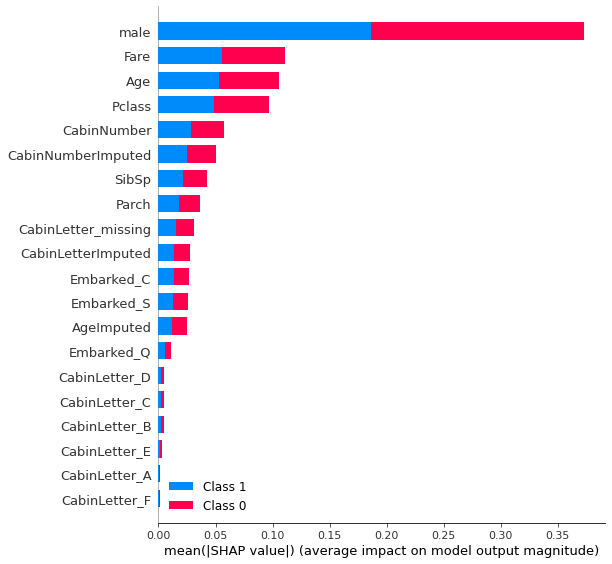

In [11]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

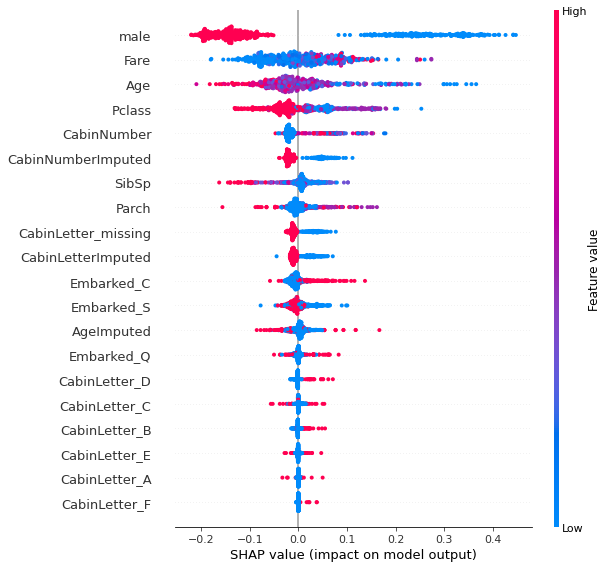

In [12]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[1], X_train)

## Influence of features in individual examples in the test set

Here we will look at individial instance predictions, and how the different features contributed to prediction for that instance.

Let's examine the first test set instance:

In [13]:
X_test.iloc[0]

Pclass                  3.0000
Age                    31.0000
SibSp                   0.0000
Parch                   0.0000
Fare                    8.6833
AgeImputed              0.0000
EmbarkedImputed         0.0000
CabinLetterImputed      1.0000
CabinNumber             0.0000
CabinNumberImputed      1.0000
male                    0.0000
Embarked_C              0.0000
Embarked_Q              0.0000
Embarked_S              1.0000
Embarked_missing        0.0000
CabinLetter_A           0.0000
CabinLetter_B           0.0000
CabinLetter_C           0.0000
CabinLetter_D           0.0000
CabinLetter_E           0.0000
CabinLetter_F           0.0000
CabinLetter_G           0.0000
CabinLetter_T           0.0000
CabinLetter_missing     1.0000
Name: 797, dtype: float64

In [14]:
# Calculate Shap values
instance = 0
choosen_instance = X_test.iloc[instance]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

I Haven't got a waterfall chart to plot with RandomForests yet.

## XG Boost

In [15]:
import xgboost
import shap

# train XGBoost model
model_boost = xgboost.XGBClassifier().fit(X_train, y_train)

[10:33:15] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [16]:
# Get explainer
explainer = shap.Explainer(model_boost, X_train)

In [17]:
# compute SHAP values for training set
shap_values = explainer(X_train)

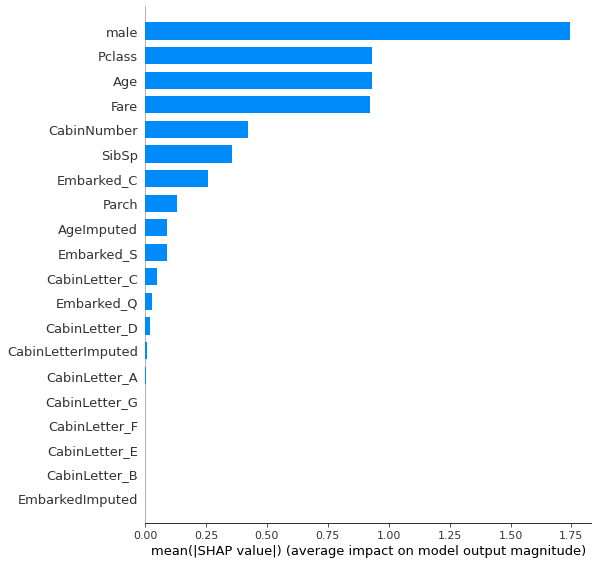

In [18]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

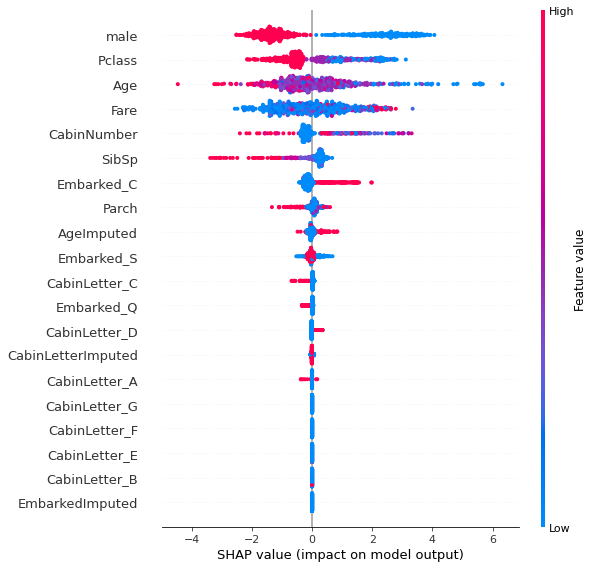

In [19]:
shap.summary_plot(shap_values, X_train)

In [20]:
# compute SHAP values for test set
shap_values = explainer(X_test)

In [21]:
shap_values[0]

.values =
array([-1.40738867e+00, -4.70359283e-01,  2.63529834e-01,  1.30839172e-01,
       -1.34215372e+00, -3.26142602e-02,  0.00000000e+00, -3.22954684e-03,
       -9.99636621e-02,  0.00000000e+00,  1.19339063e+00, -1.21306038e-01,
        6.40828468e-03, -9.88515780e-03,  0.00000000e+00, -1.09327588e-03,
        0.00000000e+00,  3.05734556e-02, -9.99110404e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

.base_values =
-1.20725871263945

.data =
array([ 3.    , 31.    ,  0.    ,  0.    ,  8.6833,  0.    ,  0.    ,
        1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  1.    ])

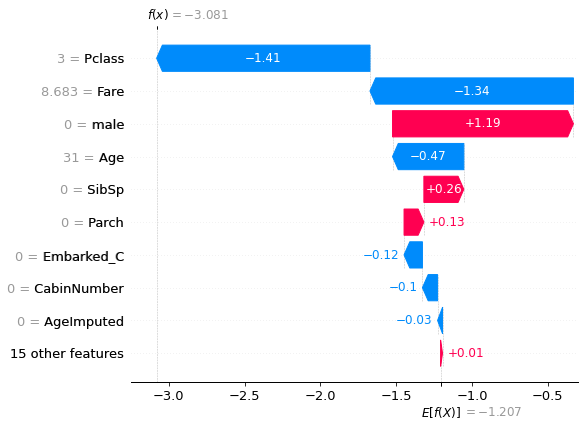

In [22]:
shap.plots.waterfall(shap_values[0])

In [23]:
# Force plot for a single instance
instance = 0
choosen_instance = X_test.iloc[instance]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, choosen_instance)